In [66]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import ColumnTransformer

# Preparation

In [67]:
# Reading the data
train_df = pd.read_csv(os.path.join("Data","train.csv"))
test_df = pd.read_csv(os.path.join("Data","test.csv"))

In [68]:
#drop the Id column as it is not necessary 
train_df.drop(["Id"],axis = 1 , inplace = True)
test_df.drop(["Id"],axis = 1 , inplace = True)

In [69]:
# split the data to create a validation dataset 
train_df,val_df = train_test_split(train_df,test_size = 0.2,random_state = 42)
train_df.reset_index(inplace = True,drop = True)
val_df.reset_index(inplace = True,drop = True)

# Feature Engineering

In [70]:
# split the dataset into numberical and categorical columns 
# TODO:SalePrice column is not included 
num_attributes = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                  '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
                  'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold',]

cat_one_hot_attributes = ['MSSubClass','MSZoning','Street','Alley','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
                    'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                          'CentralAir','Electrical','Functional','GarageType','GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']

# TODO: some of the columns might contain the na type you need to handle such catgeories values differently 

cat_ordinal_attributes = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence']

In [71]:
# handle the null values present in the columns
class DropColumns(BaseEstimator , TransformerMixin):
    def __init__(self,percentage):
        self.percentage = percentage

    def fit(self,train_df):
        self.drop_columns = []
        total_size = train_df.shape[0]
        for column in train_df.columns:
            null_counts = train_df[column].isnull().sum()
            if null_counts/total_size >= self.percentage:
                self.drop_columns.append(column)
        return self

    def transform(self,df):
        global num_attributes, cat_one_hot_pipline,cat_ordinal_pipeline
        # Remove the columns from the three global attributes 
        for column in self.drop_columns:
            if column in num_attributes:
                num_attributes.remove(column)
            elif column in cat_one_hot_attributes:
                cat_one_hot_attributes.remove(column)
            elif column in cat_ordinal_attributes:
                cat_ordinal_attributes.remove(column)
        # Remove the column present in the data frame 
        df.drop(self.drop_columns,axis = 1,inplace = True)
        self.columns = df.columns
        return df

    def get_feature_names_out(self, input_features=None):
        return self.columns


drop_columns = DropColumns(0.25)
train_df = drop_columns.fit_transform(train_df)
val_df = drop_columns.transform(val_df)
test_df = drop_columns.transform(test_df)

In [72]:
# handle the categorical columns 
cat_one_hot_pipline = make_pipeline(OneHotEncoder(handle_unknown = "ignore"))
cat_ordinal_pipeline = make_pipeline(OrdinalEncoder())

In [73]:
# preprocessing pipeline
preprocessing = ColumnTransformer([
    ('cat_one_hot',cat_one_hot_pipline,cat_one_hot_attributes),
    ('cat_ordinal',cat_ordinal_pipeline,cat_ordinal_attributes)
])

In [74]:
train_df = preprocessing.fit_transform(train_df)
val_df = preprocessing.transform(val_df)

# test_df = preprocessing.transform(test_df)


In [75]:
train_df = pd.DataFrame(train_df.toarray(),columns = preprocessing.get_feature_names_out())
val_df = pd.DataFrame(val_df.toarray(),columns = preprocessing.get_feature_names_out())
# test_df = pd.DataFrame(test_df.toarray(),columns = preprocessing.get_feature_names_out())

In [76]:
train_df

,cat_one_hot__MSSubClass_20,cat_one_hot__MSSubClass_30,cat_one_hot__MSSubClass_40,cat_one_hot__MSSubClass_45,cat_one_hot__MSSubClass_50,cat_one_hot__MSSubClass_60,cat_one_hot__MSSubClass_70,cat_one_hot__MSSubClass_75,cat_one_hot__MSSubClass_80,cat_one_hot__MSSubClass_85,...,cat_ordinal__LotShape,cat_ordinal__LandSlope,cat_ordinal__ExterQual,cat_ordinal__ExterCond,cat_ordinal__BsmtQual,cat_ordinal__BsmtCond,cat_ordinal__HeatingQC,cat_ordinal__KitchenQual,cat_ordinal__GarageQual,cat_ordinal__GarageCond
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,4.0,1.0,3.0,2.0,3.0,NaN,NaN
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,4.0,2.0,3.0,0.0,2.0,4.0,4.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,4.0,3.0,3.0,4.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0
1164,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,4.0,3.0,3.0,4.0,2.0,4.0,4.0
1165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0
1166,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,2.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0


# EDA

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     934 non-null    int64  
 1   MSZoning       934 non-null    object 
 2   LotFrontage    760 non-null    float64
 3   LotArea        934 non-null    int64  
 4   Street         934 non-null    object 
 5   Alley          61 non-null     object 
 6   LotShape       934 non-null    object 
 7   LandContour    934 non-null    object 
 8   Utilities      934 non-null    object 
 9   LotConfig      934 non-null    object 
 10  LandSlope      934 non-null    object 
 11  Neighborhood   934 non-null    object 
 12  Condition1     934 non-null    object 
 13  Condition2     934 non-null    object 
 14  BldgType       934 non-null    object 
 15  HouseStyle     934 non-null    object 
 16  OverallQual    934 non-null    int64  
 17  OverallCond    934 non-null    int64  
 18  YearBuilt 

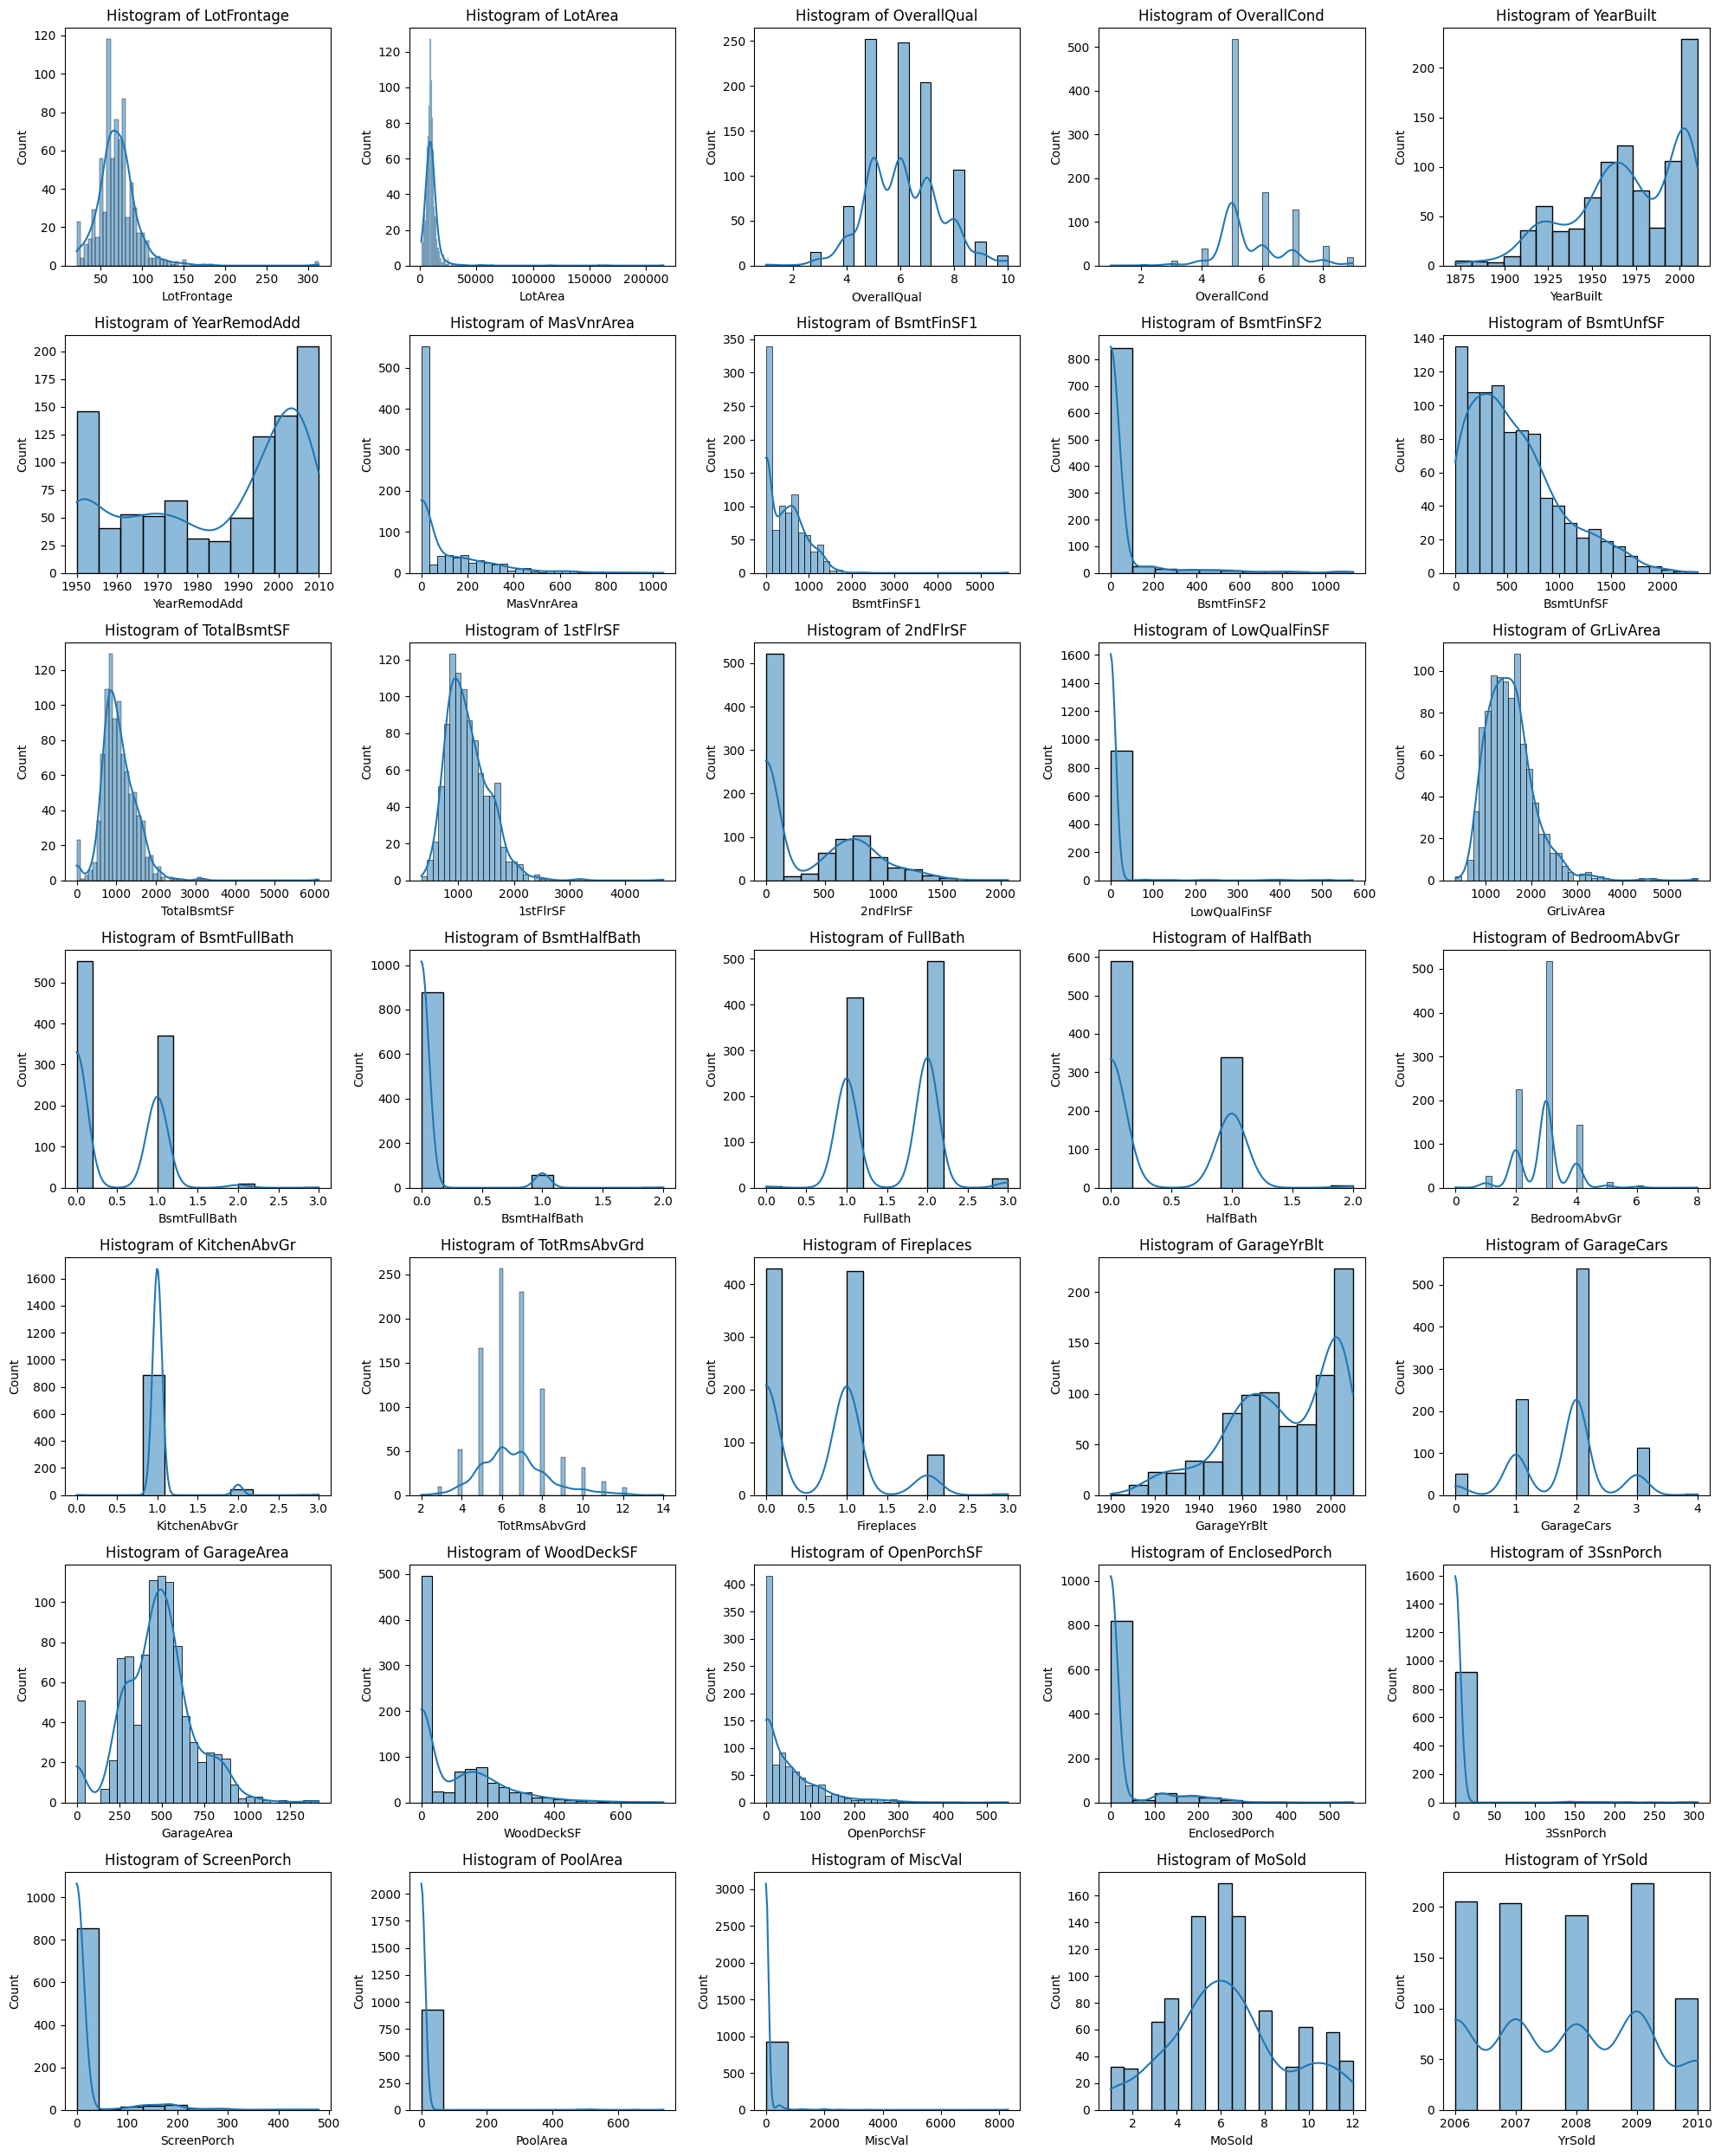

In [52]:
# plot the distribtution of all the numerical columns
n_cols = 5
fig,axis = plt.subplots(nrows = (len(num_attributes)+3) // n_cols, ncols = n_cols,figsize=(20, 5 * n_cols))
axis = axis.flatten()

for i,column in enumerate(train_df[num_attributes].columns):
    sns.histplot(train_df[column],kde = True,ax = axis[i])
    axis[i].set_title(f'Histogram of {column}')
    
plt.tight_layout()
plt.show()

# Todo: convert some of the columns into bins as there don't represent the numerical data very well 

# Model Training